In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
seed = 1
rng = default_rng(seed)
import os, os.path
from pathlib import Path
import torch
import torch.nn as nn

In [2]:
import importlib.util
spec = importlib.util.spec_from_file_location("module.fcae", str(Path(os.getcwd()).parent.parent) + '/' + "src/fcae.py")
module_fcae = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module_fcae)

In [3]:
m = 100
phi_arr = rng.random(size=m) * 2*np.pi
n = 16
dx = 2*np.pi / n
x_arr = np.arange(dx/2, 2*np.pi, dx)
X = np.array([np.cos(x_arr + phi) for phi in phi_arr])

In [4]:
# divide into train/test set
m_train = int(0.8 * m)
m_test = m - m_train;
i_train = rng.choice(range(m), size=m_train, replace=False)
i_test = list(set(list(range(m))) - set(i_train))
Xtrainraw = X[i_train]
Xtestraw = X[i_test]

In [5]:
# Normalize appropriatly, i.e., w.r.t to full input matrix X
# not needed for this data set
#meanx = np.mean(Xtrainraw)
#stdx = np.std(Xtrainraw)
#Xtrain = (Xtrainraw - meanx) / stdx
#Xtest = (Xtestraw - meanx) / stdx
Xtrain = Xtrainraw
Xtest = Xtestraw

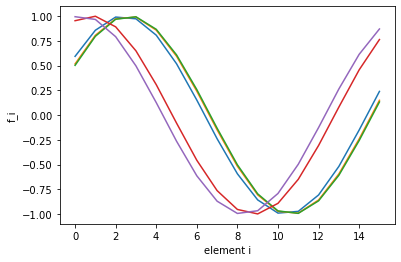

In [6]:
for i in range(5):
    plt.plot(Xtrain[i])
    plt.xlabel("element i")
    plt.ylabel("f_i")
plt.show()

In [7]:
# Create torch.Tensor and torch.utils.data.dataset.TensorDataset for training
tensor_xtrain = torch.tensor(Xtrain, dtype=torch.float)
tensor_xtest = torch.tensor(Xtest, dtype=torch.float)
train_dataset = torch.utils.data.TensorDataset(tensor_xtrain, tensor_xtrain)
test_dataset = torch.utils.data.TensorDataset(tensor_xtest, tensor_xtest)

In [8]:
# Network design
layer_widths = [n, 4, 1]
activation_function = nn.Tanh()

In [9]:
# Training design

# Size for batch gradient descent
batch_size = int(m_train / 2)

# Learning Rate
lr = 1e-3

# Number of learning epochs
num_epochs = 30000

In [10]:
fcae = module_fcae.FullyConnectedAutoencoder(layer_widths, activation_function, seed)

In [11]:
fcae.train_model(lr, batch_size, num_epochs, train_dataset, test_dataset)

Epoch MSELoss(train) MSELoss(test)
0 0.608267 0.628682
100 0.415101 0.442157
200 0.297884 0.343598
300 0.262610 0.318787
400 0.252649 0.314320
500 0.247176 0.310568
600 0.243182 0.303837
700 0.240373 0.295072
800 0.238663 0.285955
900 0.237682 0.278048
1000 0.237184 0.271782
1100 0.236843 0.266787
1200 0.236666 0.262914
1300 0.236540 0.259791
1400 0.236447 0.257254
1500 0.236356 0.255148
1600 0.236266 0.253088
1700 0.236157 0.251088
1800 0.235964 0.248874
1900 0.235662 0.246205
2000 0.235134 0.242850
2100 0.234016 0.237936
2200 0.231373 0.229959
2300 0.224150 0.215083
2400 0.205977 0.188671
2500 0.175201 0.153293
2600 0.139653 0.119763
2700 0.106519 0.091994
2800 0.080791 0.071086
2900 0.062816 0.056091
3000 0.050899 0.046072
3100 0.043130 0.039492
3200 0.038014 0.035061
3300 0.034649 0.032321
3400 0.032467 0.030640
3500 0.030989 0.029457
3600 0.029940 0.028706
3700 0.029131 0.028048
3800 0.028275 0.027199
3900 0.027461 0.026388
4000 0.026572 0.025425
4100 0.025545 0.024401
4200 0.0244

In [12]:
tensor_xptrain = fcae.forward(tensor_xtrain)
tensor_xptest = fcae.forward(tensor_xtest)

In [13]:
Xptrain = tensor_xptrain.detach().numpy()
Xptest = tensor_xptest.detach().numpy()

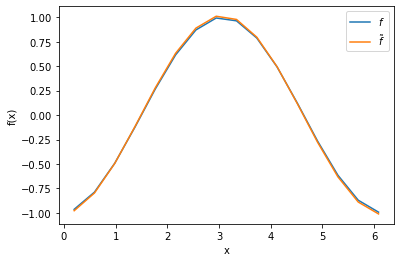

In [14]:
plt.plot(x_arr, Xtest[0], label="$f$")
plt.plot(x_arr, Xptest[0], label="$\\tilde{f}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [15]:
tensor_ctrain = fcae.encode(tensor_xtrain)
tensor_ctest = fcae.encode(tensor_xtest)

In [16]:
Ctrain = tensor_ctrain.detach().numpy()
Ctest = tensor_ctest.detach().numpy()

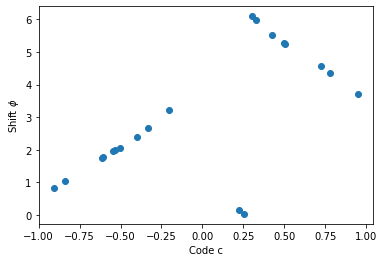

In [17]:
plt.plot(Ctest[:], phi_arr[i_test], "o")
plt.xlabel("Code c")
plt.ylabel("Shift " + "$\phi$")
plt.show()